<a href="https://colab.research.google.com/github/sunjmmeishao/AndroidTest/blob/master/CodeFormer_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **セットアップ**

# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/cedro3/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Define function
from function import *

# make dir
! mkdir download

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 418 (delta 116), reused 111 (delta 111), pack-reused 247 (from 1)
Receiving objects: 100% (418/418), 20.66 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (166/166), done.
/content/CodeFormer
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4

In [2]:
from google.colab import files
uploaded = files.upload()


Saving 1-1.mp4 to 1-1.mp4


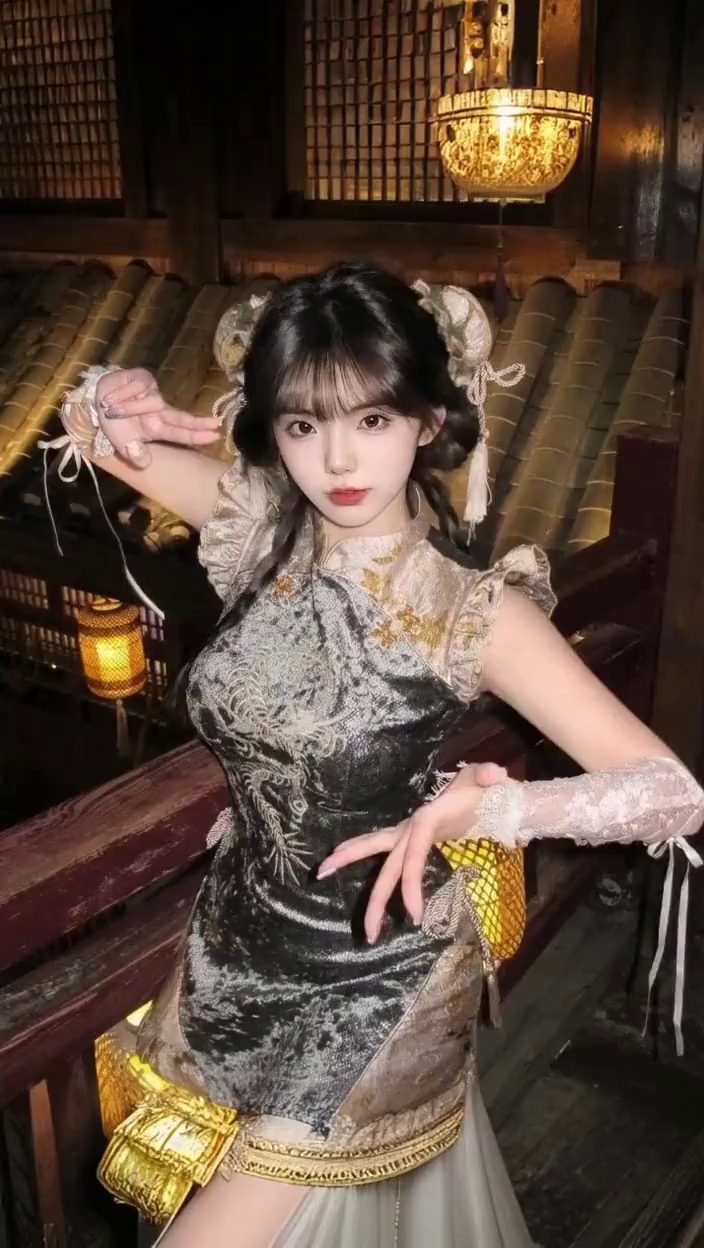

fps =  24.0
frames =  121
interval =  1


In [3]:
#@title **動画の読み込み**

#@markdown ■movie フォルダに音声付き動画（mp4）をアップロードして下さい\
#@markdown ■60秒以内（30fpsの場合）として下さい

# 設定
video = '1-1.mp4' #@param {type:"string"}
video_file = video
image_dir='inputs/frame/'
image_file='%s.png'

# video_2_images
reset_folder('inputs/frame')
fps, i, interval = video_2_images(video_file, image_dir, image_file)

# スタートフレーム表示
from google.colab.patches import cv2_imshow
img = cv2.imread('inputs/frame/000000.png')
cv2_imshow(img)

# パラメータ表示
print('fps = ', fps)
print('frames = ', i)
print('interval = ', interval)

In [ ]:
from types import FrameType
#@title **高画質化**
#@markdown　■処理時間は1秒(30fps）の動画で１分程度かかります

# 設定
input_folder = 'inputs/frame'
w = 0.7 #@param {type:"slider", min:0.1, max:0.9, step:0.1}
reset_folder('results/frame_'+str(w))

# フレームの高画質化
! python inference_codeformer.py --w $w\
                                  --test_path $input_folder\
                                  --bg_upsampler realesrgan\
                                  --face_upsample

# ログ・クリア
clear_output()

# 動画の作成
print('makeing movie...')
fps_r = fps/interval
file_path = 'results/frame_'+str(w)+'/final_results/%06d.png'
! ffmpeg -y -r $fps_r -i $file_path -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4

# 音声の抽出・付加
print('preparation for sound...')
! ffmpeg -y -i $video_file -loglevel error sound.mp3
! ffmpeg -y -i out.mp4 -i sound.mp3 -loglevel error output.mp4

# 動画の再生
print('waiting for play movie...')
display_mp4('output.mp4')

In [ ]:
#@title **ダウンロード**
#@markdown ■google chrome 専用
from google.colab import files
import shutil

dst_filepath = 'download/'+os.path.splitext(video)[0]+'_s.mp4'
shutil.copy('output.mp4', dst_filepath)
files.download(dst_filepath)